In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
customer = pd.read_csv('mall_customers.csv')
customer.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
customer.shape

(200, 5)

In [4]:
#shuffle dataset

customer = customer.sample(frac= 1)

In [5]:
customer.drop(['CustomerID', 'Genre', 'Age'], axis=1, inplace= True)
customer.sample(10)

,Annual Income (k$),Spending Score (1-100)
73,50,56
91,59,41
86,57,58
107,63,46
157,78,78
164,85,26
137,73,73
132,72,34
90,59,55
158,78,1


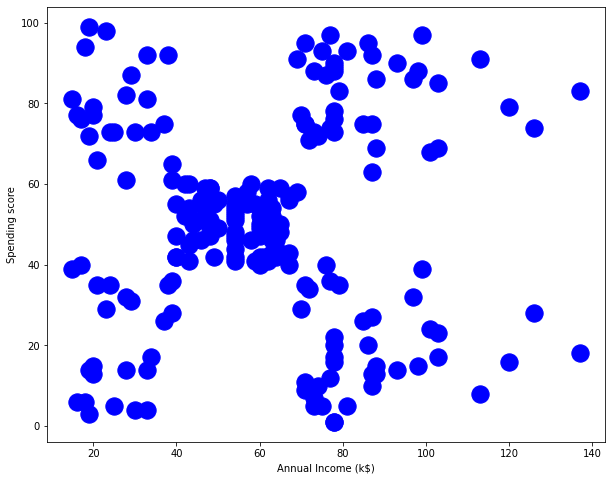

In [6]:
fig, ax = plt.subplots(figsize= (10,8))
plt.scatter(customer['Annual Income (k$)'], customer['Spending Score (1-100)'], s= 300, c= 'blue')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending score")
plt.show()

In [7]:
# from sklearn import preprocessing

# label_encoding = preprocessing.LabelEncoder()
# customer['Genre'] = label_encoding.fit_transform(customer['Genre'].astype(str))
# customer.sample(10)

In [8]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters = 5, max_iter= 1000).fit(customer)

kmeans_model.labels_[::40]

array([3, 0, 4, 1, 1], dtype=int32)

In [9]:
np.unique(kmeans_model.labels_)

array([0, 1, 2, 3, 4], dtype=int32)

In [10]:
zipped_list = list(zip(np.array(customer), kmeans_model.labels_))
zipped_list[110:125]

[(array([97, 32]), 2),
 (array([93, 90]), 1),
 (array([103,  85]), 1),
 (array([78, 22]), 2),
 (array([88, 15]), 2),
 (array([60, 40]), 4),
 (array([54, 52]), 4),
 (array([28, 82]), 0),
 (array([34, 73]), 0),
 (array([81,  5]), 2),
 (array([71, 95]), 1),
 (array([48, 50]), 4),
 (array([78,  1]), 2),
 (array([54, 54]), 4),
 (array([60, 49]), 4)]

In [11]:
centroids = kmeans_model.cluster_centers_
centroids

array([[25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [55.2962963 , 49.51851852]])

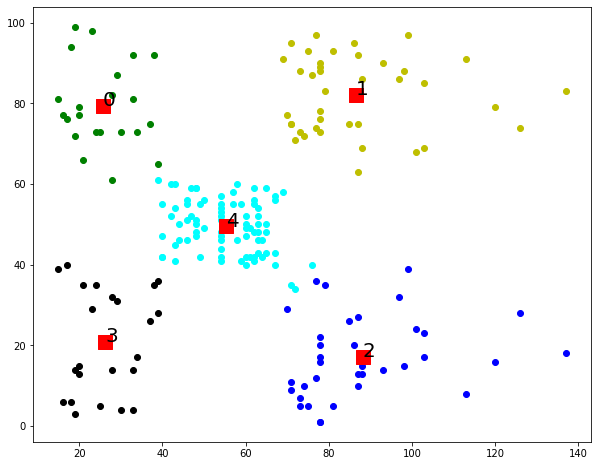

In [12]:
colors = ['g', 'y', 'b', 'k', 'aqua']
plt.figure(figsize= (10,8))

for element in zipped_list:
    plt.scatter(element[0][0], element[0][1],
               c= colors[(element[1]% len(colors))])
plt.scatter(centroids[:,0], centroids[:,1], c='r', s= 200, marker= 's')

for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0], centroids[i][1]), fontsize= 20)

In [13]:
from sklearn.metrics import silhouette_score

print("silhouette score is ", silhouette_score(customer, kmeans_model.labels_))

silhouette score is  0.553931997444648
